In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
df = pd.read_excel('NFL Data.xlsx', sheet_name='Data')

In [3]:
df.head()

,Team1,Week,Game Number,Game Location,Team2,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Team1_win,Score_diff
0,Arizona Cardinals,1,1,NaN,Kansas City Chiefs,21,44,179,103,0,360,128,1,0,-23
1,Arizona Cardinals,2,2,AWAY,Las Vegas Raiders,29,23,270,143,1,244,80,1,1,6
2,Arizona Cardinals,3,3,NaN,Los Angeles Rams,12,20,295,70,0,239,100,1,0,-8
3,Arizona Cardinals,4,4,AWAY,Carolina Panthers,26,16,206,132,1,180,40,3,1,10
4,Arizona Cardinals,5,5,NaN,Philadelphia Eagles,17,20,239,124,1,218,139,0,0,-3


In [4]:
df['total_pts'] = df.apply(lambda x: x['Team1_Score'] + x['Team2_Score'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team1            532 non-null    object
 1   Week             532 non-null    int64 
 2   Game Number      532 non-null    int64 
 3   Game Location    266 non-null    object
 4   Team2            532 non-null    object
 5   Team1_Score      532 non-null    int64 
 6   Team2_Score      532 non-null    int64 
 7   Team1_Passing    532 non-null    int64 
 8   Team1_Rushing    532 non-null    int64 
 9   Team1_Turnovers  532 non-null    int64 
 10  Team2_Passing    532 non-null    int64 
 11  Team2_Rushing    532 non-null    int64 
 12  Team2_Turnovers  532 non-null    int64 
 13  Team1_win        532 non-null    int64 
 14  Score_diff       532 non-null    int64 
 15  total_pts        532 non-null    int64 
dtypes: int64(13), object(3)
memory usage: 66.6+ KB


In [6]:
df.describe()

,Week,Game Number,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Team1_win,Score_diff,total_pts
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,9.909774,9.389098,22.204887,22.048872,220.979323,120.804511,1.302632,218.090226,122.761278,1.317669,0.500000,0.156015,44.253759
std,5.595207,5.155667,9.429955,9.354569,73.483498,55.364665,1.136848,73.812172,54.629253,1.137707,0.500471,12.668603,13.869770
min,1.000000,1.000000,0.000000,0.000000,30.000000,3.000000,0.000000,30.000000,3.000000,0.000000,0.000000,-37.000000,13.000000
25%,5.000000,5.000000,16.000000,16.000000,170.750000,76.750000,0.000000,167.750000,79.000000,0.000000,0.000000,-7.000000,35.000000
50%,10.000000,9.000000,22.000000,22.000000,214.500000,112.000000,1.000000,213.000000,115.000000,1.000000,0.500000,0.500000,43.000000
75%,15.000000,14.000000,28.000000,28.000000,266.500000,157.000000,2.000000,264.250000,158.000000,2.000000,1.000000,7.000000,53.000000
max,21.000000,20.000000,54.000000,54.000000,461.000000,363.000000,5.000000,461.000000,363.000000,5.000000,1.000000,37.000000,93.000000


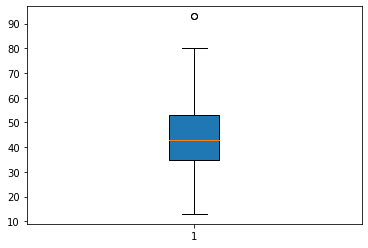

In [7]:
fig = plt.figure(figsize =(6, 4)) 
plt.boxplot(df['total_pts'], patch_artist = True)
plt.show()

In [8]:
df_winners = df[df['Team1_win']==1]
df_loosers = df[df['Team1_win']==0]

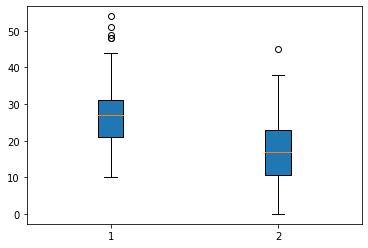

In [9]:
fig = plt.figure(figsize =(6, 4)) 
plt.boxplot([df_winners['Team1_Score'],df_loosers['Team1_Score']], patch_artist = True)
plt.show()

<AxesSubplot:ylabel='Frequency'>

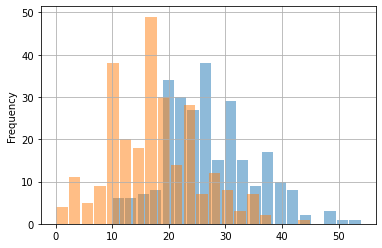

In [10]:
df_winners['Team1_Score'].plot.hist(grid=True, bins=20, rwidth=0.9, alpha=0.5)
df_loosers['Team1_Score'].plot.hist(grid=True, bins=20, rwidth=0.9, alpha=0.5)

In [11]:
corr = df.iloc[:,5:14].corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')

,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Team1_win
Team1_Score,1.000000,0.090341,0.371848,0.404070,-0.217826,0.197360,-0.125358,0.340429,0.529328
Team2_Score,0.090341,1.000000,0.169365,-0.093898,0.336660,0.375113,0.399889,-0.203893,-0.520520
Team1_Passing,0.371848,0.169365,1.000000,-0.283558,0.141443,0.071495,-0.032445,-0.072298,0.109611
Team1_Rushing,0.404070,-0.093898,-0.283558,1.000000,-0.175321,0.017353,-0.157167,0.119683,0.300276
Team1_Turnovers,-0.217826,0.336660,0.141443,-0.175321,1.000000,-0.076766,0.130889,-0.102133,-0.375682
Team2_Passing,0.197360,0.375113,0.071495,0.017353,-0.076766,1.000000,-0.300658,0.154172,-0.095536
Team2_Rushing,-0.125358,0.399889,-0.032445,-0.157167,0.130889,-0.300658,1.000000,-0.175005,-0.313651
Team2_Turnovers,0.340429,-0.203893,-0.072298,0.119683,-0.102133,0.154172,-0.175005,1.000000,0.365476
Team1_win,0.529328,-0.520520,0.109611,0.300276,-0.375682,-0.095536,-0.313651,0.365476,1.000000


In [12]:
corrw = df_winners.iloc[:,5:13].corr(method ='pearson')
corrw.style.background_gradient(cmap='coolwarm')

,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers
Team1_Score,1.000000,0.496827,0.367707,0.287281,0.044991,0.202609,0.064927,0.138888
Team2_Score,0.496827,1.000000,0.337992,0.076079,0.246634,0.383187,0.320038,-0.081883
Team1_Passing,0.367707,0.337992,1.000000,-0.384096,0.225528,0.051680,0.062720,-0.180320
Team1_Rushing,0.287281,0.076079,-0.384096,1.000000,-0.038638,0.039150,-0.076060,-0.014000
Team1_Turnovers,0.044991,0.246634,0.225528,-0.038638,1.000000,-0.035609,0.053074,0.041890
Team2_Passing,0.202609,0.383187,0.051680,0.039150,-0.035609,1.000000,-0.319198,0.166995
Team2_Rushing,0.064927,0.320038,0.062720,-0.076060,0.053074,-0.319198,1.000000,-0.094063
Team2_Turnovers,0.138888,-0.081883,-0.180320,-0.014000,0.041890,0.166995,-0.094063,1.000000


In [13]:
corrw = df_loosers.iloc[:,5:13].corr(method ='pearson')
corrw.style.background_gradient(cmap='coolwarm')

,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers
Team1_Score,1.000000,0.513362,0.376777,0.322157,-0.080249,0.384269,0.038143,0.250304
Team2_Score,0.513362,1.000000,0.194470,0.077651,0.126312,0.382489,0.269037,0.064522
Team1_Passing,0.376777,0.194470,1.000000,-0.275740,0.178805,0.114369,-0.051757,-0.045603
Team1_Rushing,0.322157,0.077651,-0.275740,1.000000,-0.102124,0.059273,-0.064473,0.048124
Team1_Turnovers,-0.080249,0.126312,0.178805,-0.102124,1.000000,-0.191082,-0.011447,0.041959
Team2_Passing,0.384269,0.382489,0.114369,0.059273,-0.191082,1.000000,-0.377121,0.254771
Team2_Rushing,0.038143,0.269037,-0.051757,-0.064473,-0.011447,-0.377121,1.000000,-0.042627
Team2_Turnovers,0.250304,0.064522,-0.045603,0.048124,0.041959,0.254771,-0.042627,1.000000


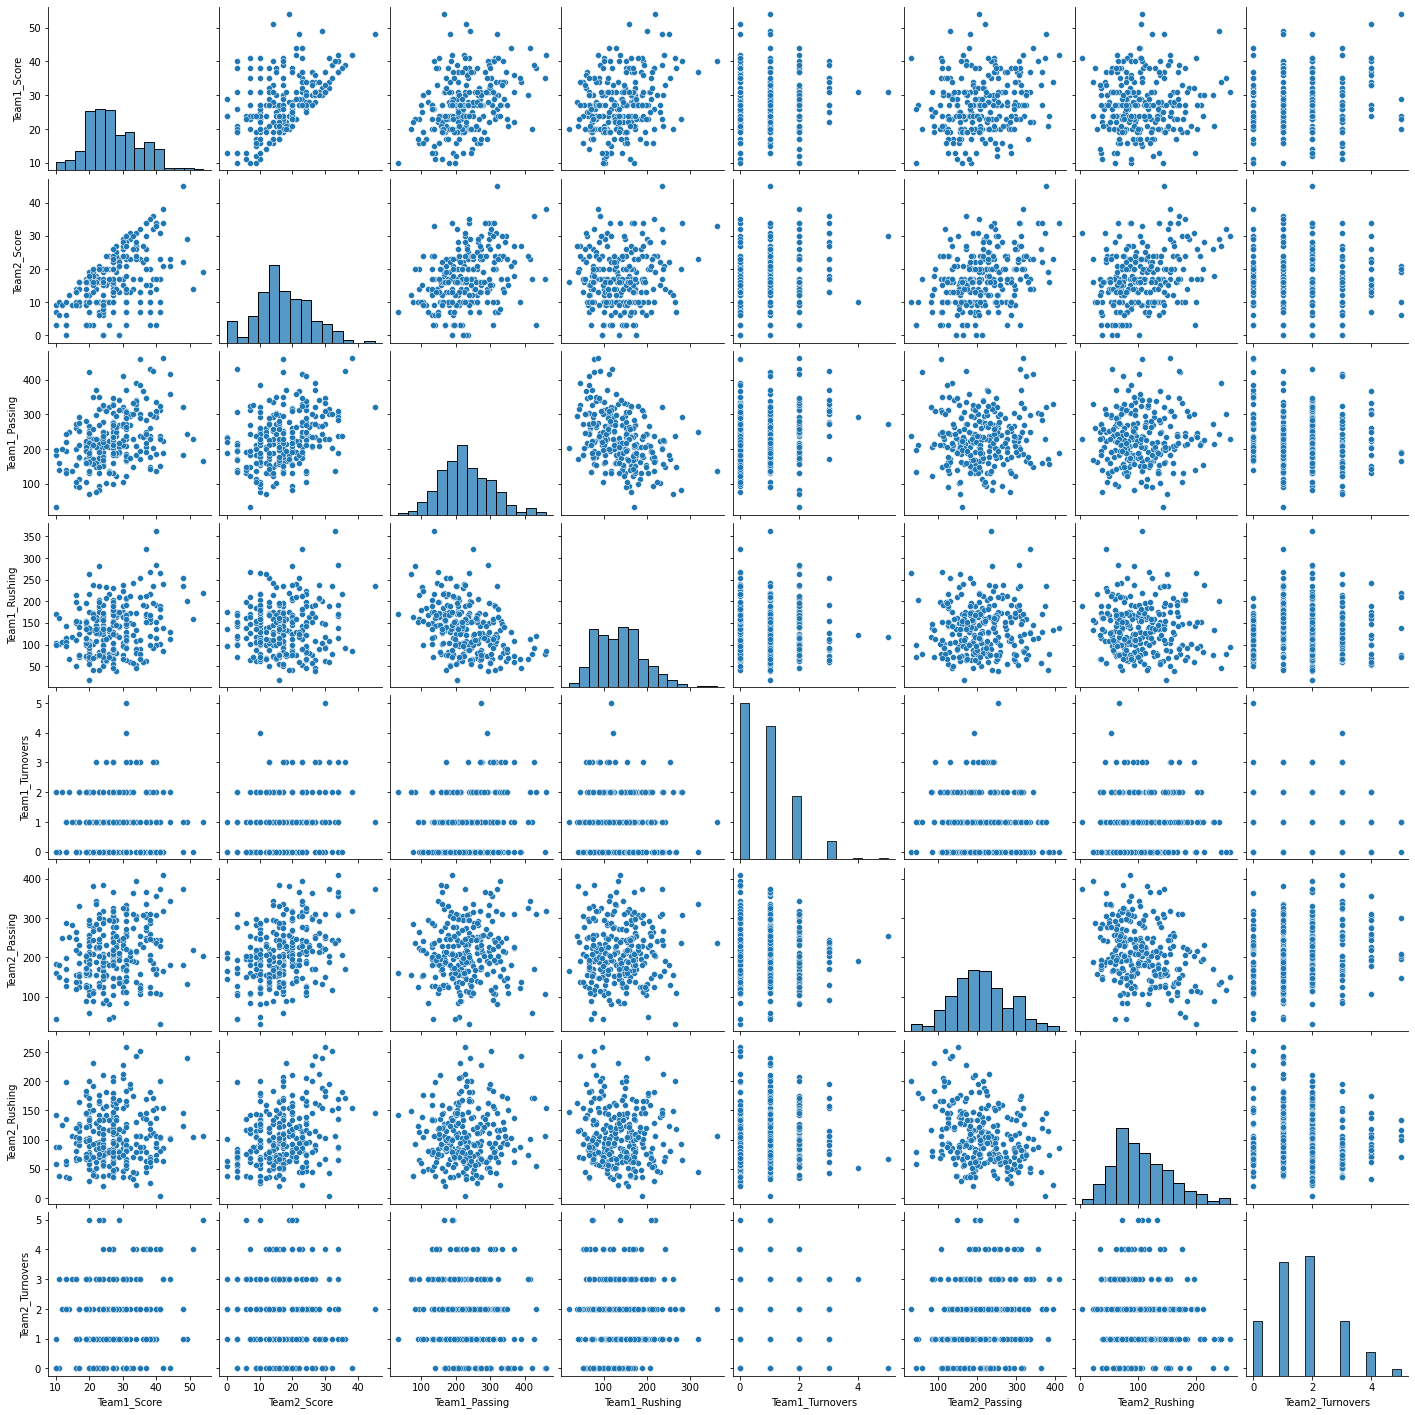

In [14]:
#sns.pairplot(df_winners.iloc[:,5:13])
#plt.show()

In [15]:
target_teams = ['Kansas City Chiefs','Philadelphia Eagles']
df_tt = df[df['Team1'].isin(target_teams)]
df_tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 263 to 458
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team1            38 non-null     object
 1   Week             38 non-null     int64 
 2   Game Number      38 non-null     int64 
 3   Game Location    17 non-null     object
 4   Team2            38 non-null     object
 5   Team1_Score      38 non-null     int64 
 6   Team2_Score      38 non-null     int64 
 7   Team1_Passing    38 non-null     int64 
 8   Team1_Rushing    38 non-null     int64 
 9   Team1_Turnovers  38 non-null     int64 
 10  Team2_Passing    38 non-null     int64 
 11  Team2_Rushing    38 non-null     int64 
 12  Team2_Turnovers  38 non-null     int64 
 13  Team1_win        38 non-null     int64 
 14  Score_diff       38 non-null     int64 
 15  total_pts        38 non-null     int64 
dtypes: int64(13), object(3)
memory usage: 5.0+ KB


In [ ]:
#fig, ax = plt.subplots(1, len(df_tt.Group.uniques()), figsize=(10,5), sharey=False)
#plt.suptitle('')
#df_tt.boxplot(column=['Team1_Score','Team1_Passing','Team1_Rushing','Team1_Turnovers'], by='Team1', ax)

<AxesSubplot:title={'center':'Team1_Turnovers'}, xlabel='Team1'>

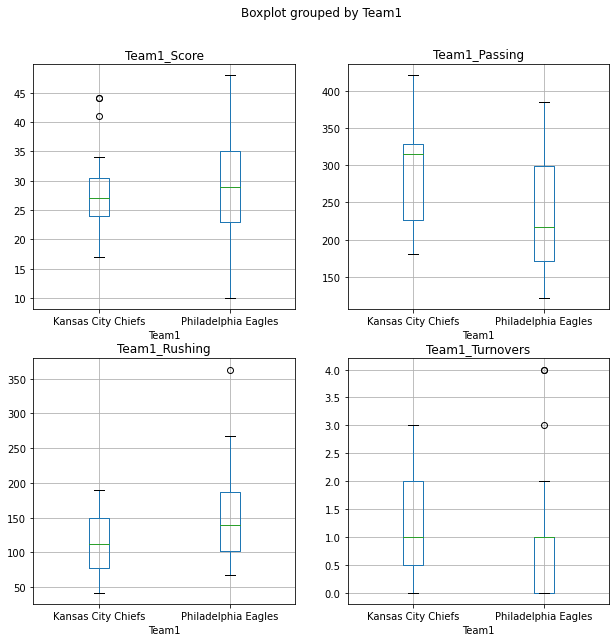

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
df_tt.boxplot('Team1_Score','Team1', ax=ax[0,0])
df_tt.boxplot('Team1_Passing','Team1', ax=ax[0,1])
df_tt.boxplot('Team1_Rushing','Team1', ax=ax[1,0])
df_tt.boxplot('Team1_Turnovers','Team1', ax=ax[1,1])

## Random forest to predict the winner

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team1            532 non-null    object
 1   Week             532 non-null    int64 
 2   Game Number      532 non-null    int64 
 3   Game Location    266 non-null    object
 4   Team2            532 non-null    object
 5   Team1_Score      532 non-null    int64 
 6   Team2_Score      532 non-null    int64 
 7   Team1_Passing    532 non-null    int64 
 8   Team1_Rushing    532 non-null    int64 
 9   Team1_Turnovers  532 non-null    int64 
 10  Team2_Passing    532 non-null    int64 
 11  Team2_Rushing    532 non-null    int64 
 12  Team2_Turnovers  532 non-null    int64 
 13  Team1_win        532 non-null    int64 
 14  Score_diff       532 non-null    int64 
 15  total_pts        532 non-null    int64 
dtypes: int64(13), object(3)
memory usage: 66.6+ KB


In [18]:
df["home"] = df["Game Location"].astype('str').astype('category').cat.codes

In [19]:
df["t2_code"] = df["Team2"].astype('str').astype('category').cat.codes

In [20]:
df.head()

,Team1,Week,Game Number,Game Location,Team2,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Team1_win,Score_diff,total_pts,home,t2_code
0,Arizona Cardinals,1,1,NaN,Kansas City Chiefs,21,44,179,103,0,360,128,1,0,-23,65,1,15
1,Arizona Cardinals,2,2,AWAY,Las Vegas Raiders,29,23,270,143,1,244,80,1,1,6,52,0,16
2,Arizona Cardinals,3,3,NaN,Los Angeles Rams,12,20,295,70,0,239,100,1,0,-8,32,1,18
3,Arizona Cardinals,4,4,AWAY,Carolina Panthers,26,16,206,132,1,180,40,3,1,10,42,0,4
4,Arizona Cardinals,5,5,NaN,Philadelphia Eagles,17,20,239,124,1,218,139,0,0,-3,37,1,25


In [21]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [22]:
train = df[df["Week"]<10]

In [23]:
test = df[df["Week"]>9]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team1            532 non-null    object
 1   Week             532 non-null    int64 
 2   Game Number      532 non-null    int64 
 3   Game Location    266 non-null    object
 4   Team2            532 non-null    object
 5   Team1_Score      532 non-null    int64 
 6   Team2_Score      532 non-null    int64 
 7   Team1_Passing    532 non-null    int64 
 8   Team1_Rushing    532 non-null    int64 
 9   Team1_Turnovers  532 non-null    int64 
 10  Team2_Passing    532 non-null    int64 
 11  Team2_Rushing    532 non-null    int64 
 12  Team2_Turnovers  532 non-null    int64 
 13  Team1_win        532 non-null    int64 
 14  Score_diff       532 non-null    int64 
 15  total_pts        532 non-null    int64 
 16  home             532 non-null    int8  
 17  t2_code          532 non-null    in

In [36]:
predictors = ["Team1_Passing","Team1_Rushing","Team1_Turnovers","Team2_Passing",\
             "Team2_Rushing","Team2_Turnovers"]

In [37]:
rf.fit(train[predictors], train["Team1_win"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [38]:
preds = rf.predict(test[predictors])

In [39]:
acc = accuracy_score(test["Team1_win"],preds)

In [40]:
acc

0.7364620938628159

In [41]:
combined = pd.DataFrame(dict(actual=test["Team1_win"], prediction=preds))

In [42]:
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,98,39
1,34,106


In [43]:
precision_score(test["Team1_win"], preds)

0.7310344827586207

In [44]:
df_teams = df[df["Team1"].isin(["Kansas City Chiefs","Philadelphia Eagles"])]

In [135]:
df_teams_stats = df_teams.groupby("Team1")["Team1_Score","Team1_Passing","Team1_Rushing","Team1_Turnovers"].agg('mean')

/var/folders/nt/t986r85d7czdtzssh_w8182c0000gn/T/ipykernel_11040/299874092.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_teams_stats = df_teams.groupby("Team1")["Team1_Score","Team1_Passing","Team1_Rushing","Team1_Turnovers"].agg('mean')


In [136]:
df_teams_stats

,Team1_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers
Team1,,,,
Kansas City Chiefs,28.736842,294.473684,113.473684,1.263158
Philadelphia Eagles,28.736842,230.210526,153.947368,1.000000


In [53]:
pred_win=pd.DataFrame([[294.5,113.5,1.26,230.2,153.95,1]])
pred_win.columns = ["Team1_Passing","Team1_Rushing","Team1_Turnovers","Team2_Passing",\
             "Team2_Rushing","Team2_Turnovers"]

In [54]:
rf.predict(pred_win)

array([0])

### Conclusion:
Based on a current team stats, the Eagles will win at 73.6% accuracy rate.

## Random Forest to predict the score

In [98]:
rf = RandomForestRegressor(n_estimators=50, min_samples_split=10, random_state=1)

In [99]:
train = df[df["Week"]<14]

In [100]:
test = df[df["Week"]>13]

In [101]:
predictors = ["Team1_Passing","Team1_Rushing","Team1_Turnovers","Team2_Passing",\
             "Team2_Rushing","Team2_Turnovers"]

In [102]:
rf.fit(train[predictors], train["Team1_Score"])

RandomForestRegressor(min_samples_split=10, n_estimators=50, random_state=1)

In [103]:
preds = rf.predict(test[predictors])

In [104]:
errors = abs(preds - test["Team1_Score"])
mape = np.mean(100 * (errors / test["Team1_Score"]))
accuracy = 100 - (mape)

In [105]:
accuracy

62.16433149529541

In [107]:
df_teams_stats

,Team1_Passing,Team1_Rushing,Team1_Turnovers
Team1,,,
Kansas City Chiefs,294.473684,113.473684,1.263158
Philadelphia Eagles,230.210526,153.947368,1.000000


In [110]:
pred_kc_score=pd.DataFrame([[294.5,113.5,1.26,230.2,153.95,1]])
pred_kc_score.columns = ["Team1_Passing","Team1_Rushing","Team1_Turnovers","Team2_Passing",\
             "Team2_Rushing","Team2_Turnovers"]

In [111]:
rf.predict(pred_kc_score)

array([24.31456782])

In [112]:
pred_pe_score=pd.DataFrame([[230.2,153.95,1,294.5,113.5,1.26]])
pred_pe_score.columns = ["Team1_Passing","Team1_Rushing","Team1_Turnovers","Team2_Passing",\
             "Team2_Rushing","Team2_Turnovers"]

In [113]:
rf.predict(pred_pe_score)

array([31.42449984])

### Conclusion:
Based on a current team stats, the predicted outcome: Chiefs (31) - Eagles (24) with at 62% accuracy rate.

## Random Forest to predict the score difference

In [117]:
rf = RandomForestRegressor(n_estimators=50, min_samples_split=10, random_state=1)
train = df[df["Week"]<14]
test = df[df["Week"]>13]
predictors = ["Team1_Passing","Team1_Rushing","Team1_Turnovers","Team2_Passing",\
             "Team2_Rushing","Team2_Turnovers"]
rf.fit(train[predictors], train["Score_diff"])
preds = rf.predict(test[predictors])

In [118]:
errors = abs(preds - test["Score_diff"])
mape = np.mean(100 * (errors / test["Score_diff"]))
accuracy = 100 - (mape)

In [119]:
accuracy

96.66744931915909

In [120]:
df_teams_stats

,Team1_Passing,Team1_Rushing,Team1_Turnovers
Team1,,,
Kansas City Chiefs,294.473684,113.473684,1.263158
Philadelphia Eagles,230.210526,153.947368,1.000000


In [121]:
pred_diff=pd.DataFrame([[294.5,113.5,1.26,230.2,153.95,1]])
pred_diff.columns = ["Team1_Passing","Team1_Rushing","Team1_Turnovers","Team2_Passing",\
             "Team2_Rushing","Team2_Turnovers"]

In [122]:
rf.predict(pred_diff)

array([-5.41858622])